In [73]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm")
import utility_functions as utils
import importlib
import pandas as pd

importlib.reload(utils)

data = '/Users/borosabel/Documents/Uni/Thesis/PopMIR/Data/Audio/test.json'

In [74]:
df = pd.read_pickle('./Data/dataframes/preprocessed_df.pkl')
df.head()

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,Lyrics,Tokens,Processed_Lyrics
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"\n\nYo\nMy crew is in the house\nTerra, Herb M...","[crew, house, bless, big, mike, imma, set, fol...",crew house terra herb mcgruff buddah bless big...
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Intro:]\nIt's the number one crew in the ...,"[number, one, crew, big, nigga, men, win, kill...",number one crew area big lightin nigga incense...
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Verse 1]\nThere are too many MC's who are...,"[many, mcs, ask, even, supposed, make, rap, kn...",many mcs overrated ask even supposed make rap ...
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Verse 1:]\nLet me get to the point real q...,"[let, point, real, quick, pocket, thick, mad, ...",let get point real quick pocket thick mad chic...
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Big L]\n A yo spark up the phillies and p...,"[pass, make, quick, money, grip, ass, street, ...",spark phillies pass stout make quick money gri...


In [75]:
df['light_preprocessed_lyrics'] = df['Lyrics'].apply(lambda x: pd.Series(utils.light_preprocessing(x)))

In [76]:
filtered_df = utils.filter_tokens_by_document_frequency(df, column_name='Tokens', min_doc_frequency=0.03, max_doc_frequency=0.99)

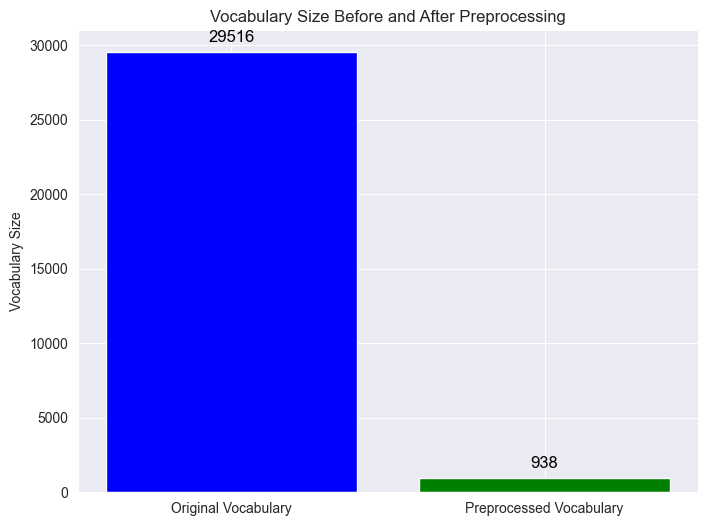

In [77]:

import matplotlib.pyplot as plt

# Assuming `df` is your dataframe with columns `light_preprocessed_lyrics` and `Tokens`

original_vocab = set()
filtered_df['light_preprocessed_lyrics'].apply(lambda x: original_vocab.update(x.split()))
original_vocab_size = len(original_vocab)

# Calculate vocabulary size after preprocessing
preprocessed_vocab = set()
filtered_df['Tokens'].apply(lambda tokens: preprocessed_vocab.update(tokens))
preprocessed_vocab_size = len(preprocessed_vocab)

# Plotting the vocabulary size reduction
plt.figure(figsize=(8, 6))
bars = plt.bar(['Original Vocabulary', 'Preprocessed Vocabulary'], [original_vocab_size, preprocessed_vocab_size], color=['blue', 'green'])
plt.title('Vocabulary Size Before and After Preprocessing')
plt.ylabel('Vocabulary Size')

# Add text annotations on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, f'{int(yval)}', ha='center', va='bottom', fontsize=12, color='black')

plt.savefig('./Plots/Vocabulary_Size_Before_Aft_Preprocessing.png')
plt.show()

In [36]:
df[['Tokens', 'Processed_Lyrics']] = df['Lyrics'].apply(lambda x: pd.Series(utils.cleanup(x)))

KeyboardInterrupt: 

In [26]:
df.head()

,Artist,Album,Song,Coast,Release Year,Tempo1,Tempo2,Duration (s),Sample Rate (Hz),Path,Lyrics,Tokens,Processed_Lyrics,light_preprocessed_lyrics
0,Big L,Lifestylez Ov Da Poor and Dangerous,8 Iz Enuff.mp3,east_coast,1995,96.774194,48.000000,298.840000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,"\n\nYo\nMy crew is in the house\nTerra, Herb M...","[crew, house, big, mike, set, better, smoke, n...",crew house terra herb mcgruff buddah bless big...,yo my crew is in the house terra herb mcgruff ...
1,Big L,Lifestylez Ov Da Poor and Dangerous,Da Graveyard.mp3,east_coast,1995,93.750000,46.511628,323.760000,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Intro:]\nIt's the number one crew in the ...,"[number, one, crew, big, nigga, men, win, kill...",number one crew area big lightin nigga incense...,it's the number one crew in the area big l be ...
2,Big L,Lifestylez Ov Da Poor and Dangerous,I Don't Understand It.mp3,east_coast,1995,93.750000,47.244094,260.226667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Verse 1]\nThere are too many MC's who are...,"[many, mcs, ask, even, make, rap, know, rap, g...",many mcs overrated ask even supposed make rap ...,there are too many mc's who are overrated you ...
3,Big L,Lifestylez Ov Da Poor and Dangerous,"No Endz, No Skinz.mp3",east_coast,1995,100.000000,50.420168,208.733333,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Verse 1:]\nLet me get to the point real q...,"[let, point, real, quick, pocket, mad, brother...",let get point real quick pocket thick mad chic...,let me get to the point real quick when ya poc...
4,Big L,Lifestylez Ov Da Poor and Dangerous,MVP.mp3,east_coast,1995,86.956522,43.478261,218.866667,48000,/Users/borosabel/Documents/Uni/Thesis/PopMIR/D...,\n\n[Big L]\n A yo spark up the phillies and p...,"[pass, make, quick, money, grip, ass, street, ...",spark phillies pass stout make quick money gri...,a yo spark up the phillies and pass the stout ...


In [27]:
df.to_pickle('preprocessed_df.pkl')

In [28]:
def save_unique_tokens(tokens_list, output_file_path):
    # Flatten the list of tokens (if you have multiple documents)
    all_tokens = [token for tokens in tokens_list for token in tokens]

    # Get unique tokens
    unique_tokens = sorted(set(all_tokens))  # Sorted for easier review

    # Write unique tokens to a file
    with open(output_file_path, 'w', encoding='utf-8') as file:
        for token in unique_tokens:
            file.write(f"{token}\n")

list_of_unique_tokens = list(df['Tokens'])
save_unique_tokens(list_of_unique_tokens, "unique_tokens.txt")

In [29]:
len(list_of_unique_tokens)

1368

<b>Statistics</b>

/var/folders/99/617f3z715_g8nc26tll89ddc0000gn/T/ipykernel_72125/804444209.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns_barplot = sns.barplot(x='Count', y='Word', data=token_counts_df, palette='crest')  # Using Seaborn's palette


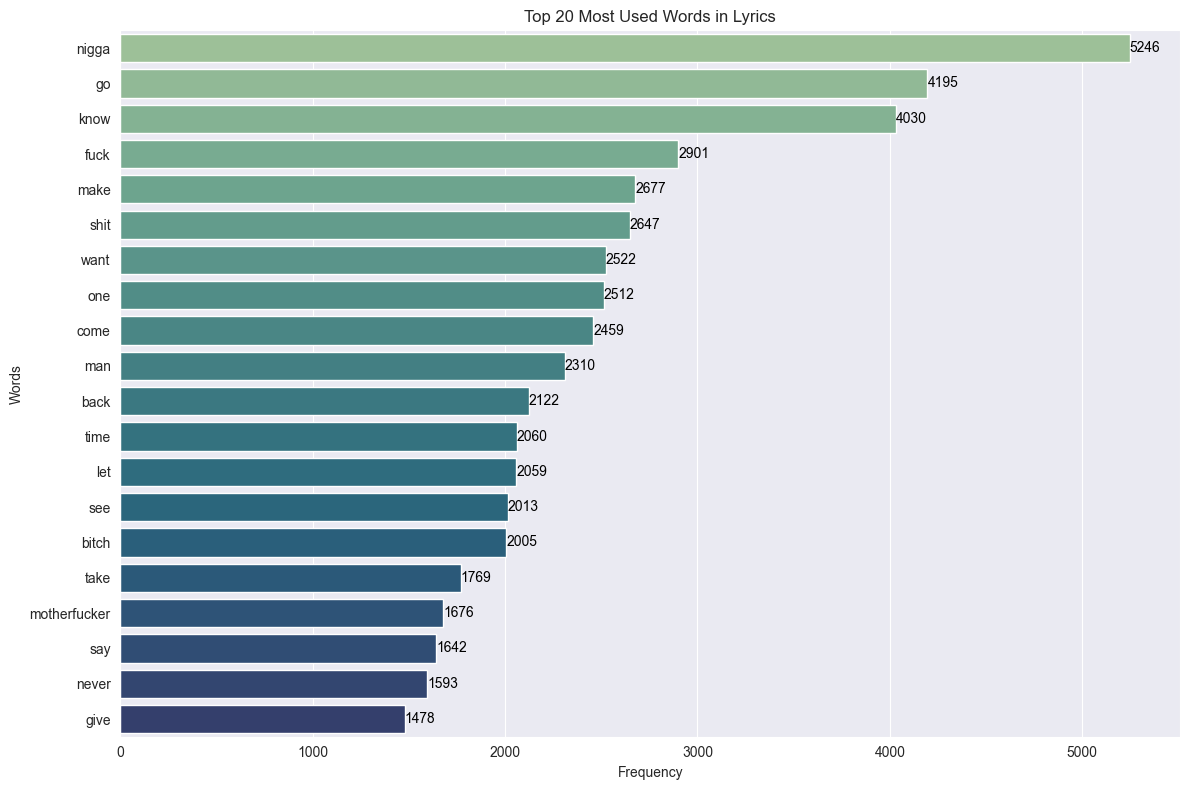

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Assuming df is your dataframe that contains the 'Tokens' column with lists of strings (tokens)
# Example:
# df = pd.read_csv('your_lyrics_data.csv')

# Step 1: Flatten all the tokens from the 'Tokens' column into a single list
all_tokens = [token for tokens_list in df['Tokens'] for token in tokens_list]

# Step 2: Count the frequency of each token using Counter
token_counts = Counter(all_tokens)

# Step 3: Convert the counts to a DataFrame
token_counts_df = pd.DataFrame(token_counts.items(), columns=['Word', 'Count'])

# Step 4: Sort the words by frequency in descending order and get the top N words
top_n = 20  # You can change this to however many words you want to see
token_counts_df = token_counts_df.sort_values(by='Count', ascending=False).head(top_n)

# Step 5: Plot the most used words and their counts using Seaborn
plt.figure(figsize=(12, 8))
sns_barplot = sns.barplot(x='Count', y='Word', data=token_counts_df, palette='crest')  # Using Seaborn's palette

# Step 6: Add frequency numbers on top of each bar
for index, value in enumerate(token_counts_df['Count']):
    plt.text(value + 1, index, str(value), color='black', va='center', fontsize=10)  # `+1` for slight space from bar

# Set labels and title
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title(f'Top {top_n} Most Used Words in Lyrics')
plt.tight_layout()
plt.savefig('./Plots/word-frequency.png')
plt.show()

/var/folders/99/617f3z715_g8nc26tll89ddc0000gn/T/ipykernel_72125/1189786371.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='ngram', data=ngram_df, palette='viridis')


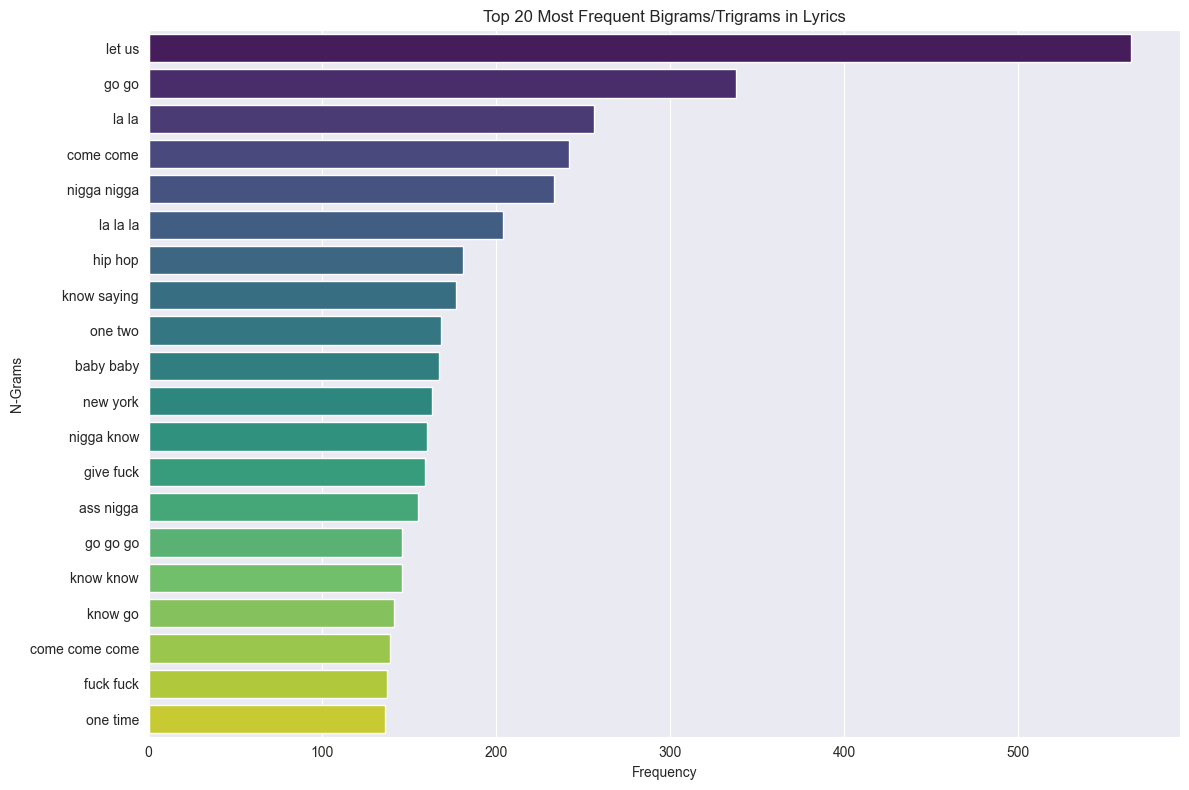

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine all tokens into single text
all_text = [' '.join(tokens) for tokens in df['Tokens']]

# Use CountVectorizer to get bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X = vectorizer.fit_transform(all_text)

# Get the top n-grams
ngram_counts = X.sum(axis=0).A1
ngram_names = vectorizer.get_feature_names_out()
ngram_df = pd.DataFrame({'ngram': ngram_names, 'count': ngram_counts})
ngram_df = ngram_df.sort_values(by='count', ascending=False).head(20)

# Plot the top n-grams
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='ngram', data=ngram_df, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('N-Grams')
plt.savefig('./Plots/n-grams-frequency.png')
plt.title('Top 20 Most Frequent Bigrams/Trigrams in Lyrics')
plt.tight_layout()
plt.show()